In [1]:
#author: Amelie Bauerdick
#Wabnitz Lab

# Import Packages

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
import hdbscan

# Load CSV

In [3]:
data=pd.read_csv("path/DMAP_1D.csv")
data

,Area_M01,Area_M02,Area_M06,Area_M07,Area_MC,Aspect_Ratio_M01,Aspect_Ratio_M02,Aspect_Ratio_M06,Aspect_Ratio_M07,Length_M01,...,file_name,index_file,donor,file_number,PDL1plus_and_PMN,PDL1minus_and_PMN,Intensity_MC_Ch02,Intensity_MC_Ch03,Intensity_MC_Ch07,Intensity_MC_Ch11
0,0.196056,0.176054,0.347826,0.128889,0.112829,0.806404,0.900965,0.754698,0.857556,0.136986,...,CNR_GI_11,0,1,1,1.0,0.0,18549.958984,8922.465820,8162.004395,2691.512939
1,0.370704,0.195616,0.424431,0.220444,0.236184,0.923784,0.895964,0.752222,0.828787,0.191781,...,CNR_GI_11,1,1,1,1.0,0.0,10592.503906,10829.438477,52029.429688,1970.516357
2,0.207887,0.231366,0.305728,0.091852,0.128289,0.786134,0.876067,0.805219,0.925017,0.136986,...,CNR_GI_11,2,1,1,1.0,0.0,24425.048828,8062.807617,57487.359375,3579.562500
3,0.270423,0.268803,0.374051,0.201185,0.173355,0.880720,0.928279,0.804929,0.843540,0.164384,...,CNR_GI_11,3,1,1,1.0,0.0,21277.480469,4794.350586,57998.902344,4766.680664
4,0.380845,0.269477,0.685300,0.296000,0.282237,0.900429,0.913033,0.750347,0.853506,0.191781,...,CNR_GI_11,4,1,1,1.0,0.0,56849.820312,10702.029297,23129.652344,23753.763672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.316056,0.219899,0.494824,0.113778,0.204934,0.934788,0.975995,0.715461,0.823125,0.205479,...,CNR_GI_h202_16,15906,1,3,0.0,1.0,346983.093750,-2679.629639,209434.765625,11628.280273
29996,0.429296,0.408432,0.550034,0.242074,0.303947,0.538055,0.636997,0.803705,0.682428,0.328767,...,CNR_GI_h202_16,15908,1,3,1.0,0.0,357852.156250,35828.441406,240487.234375,12375.440430
29997,0.401127,0.304553,0.577640,0.199407,0.282566,0.965300,0.976559,0.832770,0.905640,0.205479,...,CNR_GI_h202_16,15912,1,3,1.0,0.0,109244.398438,37584.531250,245935.640625,8594.532227
29998,0.169014,0.226644,0.316770,0.123556,0.120066,0.848934,0.939034,0.575990,0.783045,0.109589,...,CNR_GI_h202_16,15913,1,3,1.0,0.0,251479.375000,4569.484375,229110.781250,19504.138672


In [4]:
list(data.columns)

['Area_M01',
 'Area_M02',
 'Area_M06',
 'Area_M07',
 'Area_MC',
 'Aspect_Ratio_M01',
 'Aspect_Ratio_M02',
 'Aspect_Ratio_M06',
 'Aspect_Ratio_M07',
 'Length_M01',
 'Length_M02',
 'Length_M06',
 'Length_M07',
 'Width_M01',
 'Width_M02',
 'Width_M06',
 'Width_M07',
 'Height_M01',
 'Height_M02',
 'Height_M06',
 'Height_M07',
 'Circularity_Morphology(M07__Ch07)',
 'Delta_Centroid_XY',
 'Circularity_M01',
 'Diameter_M01',
 'Perimeter_M01',
 'Symmetry_3_M01_Ch07',
 'Ratio_cell/nucleus',
 'Lobe_Count_Morphology(M07__Ch07)_Ch07',
 'Major_Axis_MC',
 'Cytoplasmic_size',
 'Similarity_MC_Ch02_Ch07',
 'Circularity_MC',
 'Major_Axis_M02',
 'Cortical_F_actin_(%)',
 'Nuclear_F_actin',
 'Shape_Ratio_M01',
 'Area_Cytoplasm',
 'x',
 'y',
 'file_name',
 'index_file',
 'donor',
 'file_number',
 'PDL1plus_and_PMN',
 'PDL1minus_and_PMN',
 'Intensity_MC_Ch02',
 'Intensity_MC_Ch03',
 'Intensity_MC_Ch07',
 'Intensity_MC_Ch11']

# Store Features Temporarily

In [5]:
index_file= data[['index_file']].copy()
names= data[['file_name']].copy()
number= data[['file_number']].copy()
donor= data[['donor']].copy()
PDL1p=data[['PDL1plus_and_PMN']].copy()
PDL1n=data[['PDL1minus_and_PMN']].copy()

Int2= data[['Intensity_MC_Ch02']].copy()
Int3= data[['Intensity_MC_Ch03']].copy()
Int7= data[['Intensity_MC_Ch07']].copy()
Int11= data[['Intensity_MC_Ch11']].copy()

In [6]:
data = data.drop(columns=[
                          'file_name',
                          'index_file',
                          'donor',
                          'file_number',
                          'PDL1plus_and_PMN',
                          'PDL1minus_and_PMN',
                          'Intensity_MC_Ch02',
                          'Intensity_MC_Ch03',
                          'Intensity_MC_Ch07',
                          'Intensity_MC_Ch11',
    
 ])

# K-Means

In [7]:
#elbow plot
#source: https://www.youtube.com/watch?v=iNlZ3IU5Ffw

def elbow_k_means(data, max_k):
    means = []
    inertias = []    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
     
    plt.figure(figsize=(8, 3))  
    plt.plot(means, inertias, color='black',marker='o', markersize=8,linewidth=2)  
    plt.xlabel('Number of Clusters',fontsize=20)  
    plt.ylabel('Inertia', fontsize=20)  
    plt.title('Inertia Curve', fontsize=24)  
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)
    plt.savefig('png/elbow_dmap_1d', dpi=300, bbox_inches = 'tight')
    plt.show()  

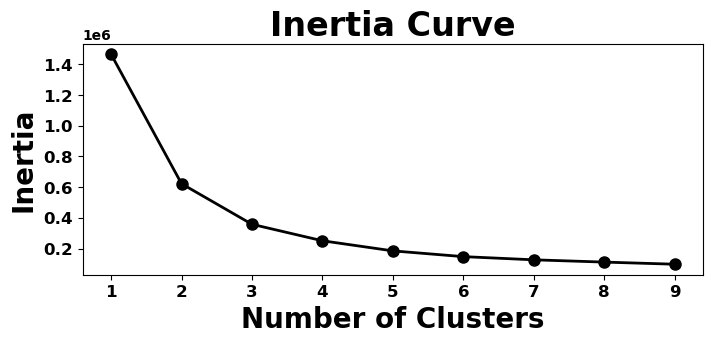

In [8]:
elbow_k_means(data, 10)

In [9]:
kmeans_labels = cluster.KMeans(n_clusters=9).fit_predict(data)

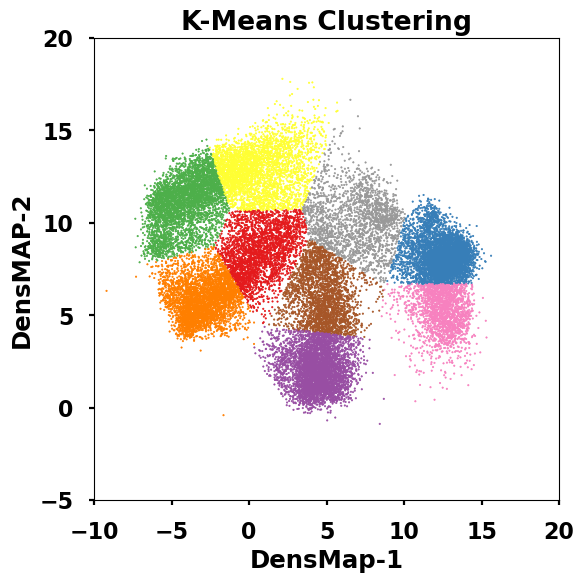

In [10]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(6, 6))

plt.scatter(data[['x']],data[['y']], c=kmeans_labels, s=1, cmap='Set1');
plt.title('K-Means Clustering')
plt.xlabel('DensMap-1')
plt.ylabel('DensMAP-2')
plt.xlim(-10, 20)
plt.ylim(-5, 20)

plt.savefig('png/kmeans_1d', dpi=300, bbox_inches = 'tight')

In [11]:
list(data.columns)

['Area_M01',
 'Area_M02',
 'Area_M06',
 'Area_M07',
 'Area_MC',
 'Aspect_Ratio_M01',
 'Aspect_Ratio_M02',
 'Aspect_Ratio_M06',
 'Aspect_Ratio_M07',
 'Length_M01',
 'Length_M02',
 'Length_M06',
 'Length_M07',
 'Width_M01',
 'Width_M02',
 'Width_M06',
 'Width_M07',
 'Height_M01',
 'Height_M02',
 'Height_M06',
 'Height_M07',
 'Circularity_Morphology(M07__Ch07)',
 'Delta_Centroid_XY',
 'Circularity_M01',
 'Diameter_M01',
 'Perimeter_M01',
 'Symmetry_3_M01_Ch07',
 'Ratio_cell/nucleus',
 'Lobe_Count_Morphology(M07__Ch07)_Ch07',
 'Major_Axis_MC',
 'Cytoplasmic_size',
 'Similarity_MC_Ch02_Ch07',
 'Circularity_MC',
 'Major_Axis_M02',
 'Cortical_F_actin_(%)',
 'Nuclear_F_actin',
 'Shape_Ratio_M01',
 'Area_Cytoplasm',
 'x',
 'y']

# Gaussian Mixture

In [12]:
gmm = GaussianMixture(n_components=9, random_state=42)
gmm.fit(data)
gaussian_labels = gmm.predict(data)

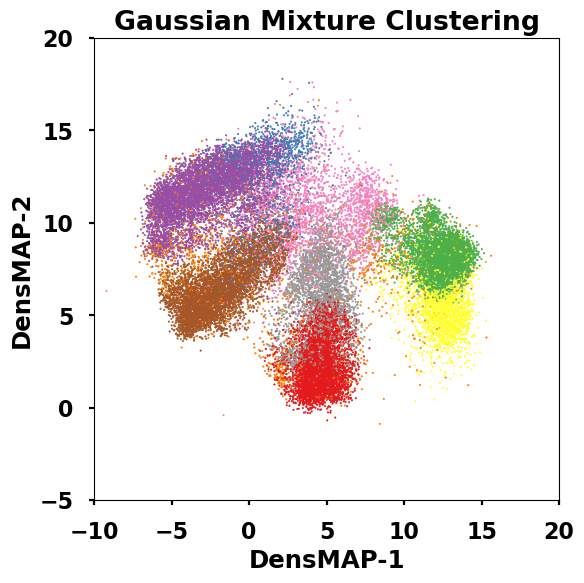

In [13]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(6, 6))

plt.scatter(data[['x']],data[['y']], c=gaussian_labels, s=1, cmap='Set1');
plt.title('Gaussian Mixture Clustering')
plt.xlabel('DensMAP-1')
plt.ylabel('DensMAP-2')
plt.xlim(-10, 20)
plt.ylim(-5, 20)

plt.savefig('png/gaussian_1d', dpi=300, bbox_inches = 'tight')

# HDBSCAN

In [14]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=300,gen_min_span_tree=True)
clusterer.fit(data)
hdbscan_labels = clusterer.labels_
outliers_mask = hdbscan_labels == -1

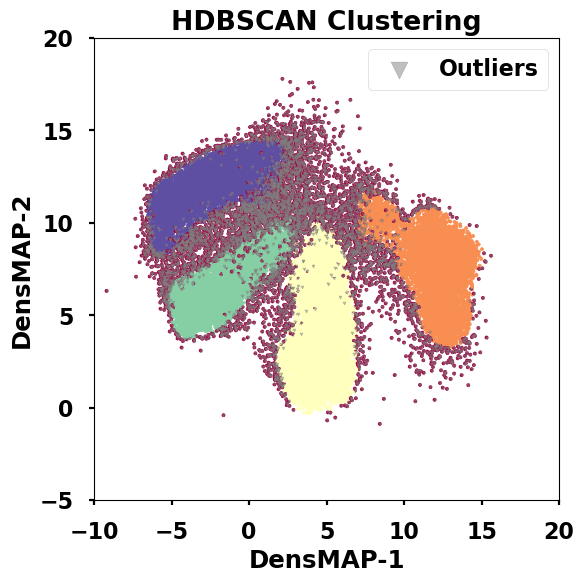

In [15]:
plt.style.use('seaborn-v0_8-poster')
plt.figure(figsize=(6, 6))

plt.scatter(data[['x']],data[['y']] , c=hdbscan_labels, cmap='Spectral', s=5)
plt.scatter(data.loc[outliers_mask, 'x'], data.loc[outliers_mask, 'y'],s=4, c='gray', marker='v', label='Outliers', alpha=0.5)
plt.title('HDBSCAN Clustering')
plt.xlabel('DensMAP-1')
plt.ylabel('DensMAP-2')
plt.xlim(-10, 20)
plt.ylim(-5, 20)
plt.legend(markerscale=6)

plt.savefig('png/hdbscan_1d', dpi=300, bbox_inches = 'tight')
plt.show()

# Save Data

In [16]:
#data['cluster'] = kmeans_labels.tolist()
data['cluster'] = gaussian_labels.tolist()
#data['cluster'] = hdbscan_labels.tolist()


In [17]:
data

,Area_M01,Area_M02,Area_M06,Area_M07,Area_MC,Aspect_Ratio_M01,Aspect_Ratio_M02,Aspect_Ratio_M06,Aspect_Ratio_M07,Length_M01,...,Similarity_MC_Ch02_Ch07,Circularity_MC,Major_Axis_M02,Cortical_F_actin_(%),Nuclear_F_actin,Shape_Ratio_M01,Area_Cytoplasm,x,y,cluster
0,0.196056,0.176054,0.347826,0.128889,0.112829,0.806404,0.900965,0.754698,0.857556,0.136986,...,0.375672,0.290033,0.264590,0.371504,0.803915,0.791931,0.425352,-5.328113,8.713662,3
1,0.370704,0.195616,0.424431,0.220444,0.236184,0.923784,0.895964,0.752222,0.828787,0.191781,...,0.361881,0.327017,0.278892,0.336558,0.806113,0.810253,0.219014,-3.707437,6.400628,6
2,0.207887,0.231366,0.305728,0.091852,0.128289,0.786134,0.876067,0.805219,0.925017,0.136986,...,0.343917,0.386908,0.306106,0.386964,0.421136,0.849951,0.337324,12.695004,8.861262,2
3,0.270423,0.268803,0.374051,0.201185,0.173355,0.880720,0.928279,0.804929,0.843540,0.164384,...,0.227832,0.480146,0.320622,0.399794,0.627743,0.801601,0.200704,4.328063,1.067020,0
4,0.380845,0.269477,0.685300,0.296000,0.282237,0.900429,0.913033,0.750347,0.853506,0.191781,...,0.576932,0.239709,0.323625,0.341672,0.856233,0.914077,0.430282,12.082021,4.237677,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.316056,0.219899,0.494824,0.113778,0.204934,0.934788,0.975995,0.715461,0.823125,0.205479,...,0.250425,0.644575,0.282554,0.321849,0.495479,0.839537,0.388732,5.034532,0.741805,0
29996,0.429296,0.408432,0.550034,0.242074,0.303947,0.538055,0.636997,0.803705,0.682428,0.328767,...,0.341536,0.145744,0.478435,0.454361,0.616579,0.555020,0.232394,-0.624660,13.294653,3
29997,0.401127,0.304553,0.577640,0.199407,0.282566,0.965300,0.976559,0.832770,0.905640,0.205479,...,0.531752,0.360106,0.332638,0.340006,0.690104,0.890118,0.328873,5.979607,1.668283,0
29998,0.169014,0.226644,0.316770,0.123556,0.120066,0.848934,0.939034,0.575990,0.783045,0.109589,...,0.452757,0.188648,0.292639,0.427701,0.625860,0.842698,0.212676,3.091995,1.650366,0


In [18]:
frames=[data,names,index_file,donor,number,PDL1p,PDL1n,Int2,Int3,Int7,Int11]
data=pd.concat(frames, axis=1)
data

,Area_M01,Area_M02,Area_M06,Area_M07,Area_MC,Aspect_Ratio_M01,Aspect_Ratio_M02,Aspect_Ratio_M06,Aspect_Ratio_M07,Length_M01,...,file_name,index_file,donor,file_number,PDL1plus_and_PMN,PDL1minus_and_PMN,Intensity_MC_Ch02,Intensity_MC_Ch03,Intensity_MC_Ch07,Intensity_MC_Ch11
0,0.196056,0.176054,0.347826,0.128889,0.112829,0.806404,0.900965,0.754698,0.857556,0.136986,...,CNR_GI_11,0,1,1,1.0,0.0,18549.958984,8922.465820,8162.004395,2691.512939
1,0.370704,0.195616,0.424431,0.220444,0.236184,0.923784,0.895964,0.752222,0.828787,0.191781,...,CNR_GI_11,1,1,1,1.0,0.0,10592.503906,10829.438477,52029.429688,1970.516357
2,0.207887,0.231366,0.305728,0.091852,0.128289,0.786134,0.876067,0.805219,0.925017,0.136986,...,CNR_GI_11,2,1,1,1.0,0.0,24425.048828,8062.807617,57487.359375,3579.562500
3,0.270423,0.268803,0.374051,0.201185,0.173355,0.880720,0.928279,0.804929,0.843540,0.164384,...,CNR_GI_11,3,1,1,1.0,0.0,21277.480469,4794.350586,57998.902344,4766.680664
4,0.380845,0.269477,0.685300,0.296000,0.282237,0.900429,0.913033,0.750347,0.853506,0.191781,...,CNR_GI_11,4,1,1,1.0,0.0,56849.820312,10702.029297,23129.652344,23753.763672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.316056,0.219899,0.494824,0.113778,0.204934,0.934788,0.975995,0.715461,0.823125,0.205479,...,CNR_GI_h202_16,15906,1,3,0.0,1.0,346983.093750,-2679.629639,209434.765625,11628.280273
29996,0.429296,0.408432,0.550034,0.242074,0.303947,0.538055,0.636997,0.803705,0.682428,0.328767,...,CNR_GI_h202_16,15908,1,3,1.0,0.0,357852.156250,35828.441406,240487.234375,12375.440430
29997,0.401127,0.304553,0.577640,0.199407,0.282566,0.965300,0.976559,0.832770,0.905640,0.205479,...,CNR_GI_h202_16,15912,1,3,1.0,0.0,109244.398438,37584.531250,245935.640625,8594.532227
29998,0.169014,0.226644,0.316770,0.123556,0.120066,0.848934,0.939034,0.575990,0.783045,0.109589,...,CNR_GI_h202_16,15913,1,3,1.0,0.0,251479.375000,4569.484375,229110.781250,19504.138672


In [19]:
data.to_csv("path/DMAP_1d_2.csv",index=False)